<a href="https://colab.research.google.com/github/prashamsa0512/NLP/blob/main/nlp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten

# (a) Preprocessing the Data
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# (b) Divide data into training and testing dataset
# The data is already divided as x_train, y_train for training and x_test, y_test for testing

# (c) Build the Recurrent Neural Network (RNN) Model
model = Sequential()
# Add an RNN layer with 128 units and an input shape of (28, 28) which corresponds to the flattened images
model.add(SimpleRNN(128, input_shape=(28, 28), activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output units for the 10 classes (digits 0-9)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# (d) Train the RNN Model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# (e) Evaluate the Model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.7157 - loss: 0.8295 - val_accuracy: 0.9490 - val_loss: 0.1802
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9402 - loss: 0.2027 - val_accuracy: 0.9598 - val_loss: 0.1417
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9544 - loss: 0.1560 - val_accuracy: 0.9667 - val_loss: 0.1413
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9623 - loss: 0.1366 - val_accuracy: 0.9767 - val_loss: 0.0889
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9662 - loss: 0.1222 - val_accuracy: 0.9690 - val_loss: 0.1048
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9549 - loss: 0.1491
Test accuracy: 0.9617000222206116


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9663
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9880
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9562
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9584
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9344
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0216
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8679
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9603
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9619
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9541


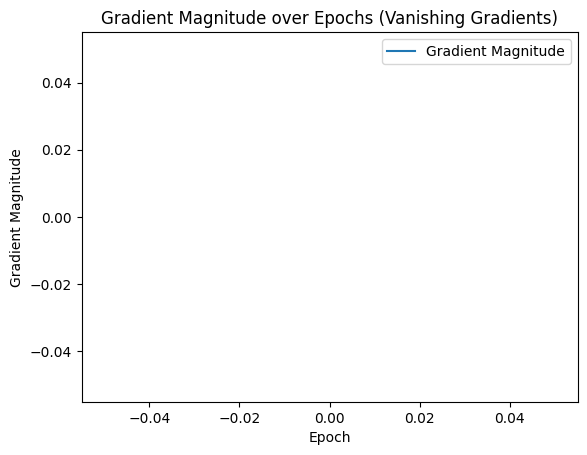

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
# Custom callback to record gradients
class GradientTracker(Callback):
    def on_train_begin(self, logs=None):
        self.epoch_gradients = []
    def on_epoch_end(self, epoch, logs=None):
        # Get the gradients for each layer
        weights = self.model.trainable_weights  # Variables of the model
        #gradients = self.model.optimizer.get_gradients(self.model.total_loss, weights)
        #self.epoch_gradients.append(gradients)
# Create a simple deep network to show gradient issues
def create_deep_model(activation_function='sigmoid'):
    model = Sequential()
    # A deep network of 10 hidden layers with 128 neurons each
    model.add(Dense(128, input_shape=(10,), activation=activation_function))
    for _ in range(9):  # Adding more layers to make the network deep
        model.add(Dense(128, activation=activation_function))
    model.add(Dense(1))  # Output layer
    return model
# Generate random data
np.random.seed(42)
X = np.random.randn(1000, 10)  # 1000 samples with 10 features
y = np.random.randn(1000, 1)   # Random target values

# Create a deep network using sigmoid (vanishing gradient case)
model = create_deep_model(activation_function='sigmoid')

# Compile the model using SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Instantiate the gradient tracker callback
gradient_tracker = GradientTracker()

# Train the model and track the gradients
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1, callbacks=[gradient_tracker])

# Analyze the gradients
gradients = gradient_tracker.epoch_gradients

# Function to calculate the magnitude of gradients
def calculate_gradient_magnitude(gradients):
    grad_norms = []
    for epoch_grad in gradients:
        epoch_norms = []
        for grad in epoch_grad:
            if grad is not None:
                norm = np.linalg.norm(grad.numpy())
                epoch_norms.append(norm)
        grad_norms.append(np.mean(epoch_norms))
    return grad_norms

# Calculate the gradient norms for each epoch
gradient_magnitudes = calculate_gradient_magnitude(gradients)

# Plot the gradient norms over epochs
plt.plot(range(1, len(gradient_magnitudes) + 1), gradient_magnitudes, label="Gradient Magnitude")
plt.title("Gradient Magnitude over Epochs (Vanishing Gradients)")
plt.xlabel("Epoch")
plt.ylabel("Gradient Magnitude")
plt.legend()
plt.show()